<br>
# **Sentence 분석하기**
자연어 문장의 분석방법 살펴보기

### Review
1. Text 자료를 파이썬으로 불러오기
1. 불필요한 내용들 전처리
1. Text 를 문장별/ 단어별 Token으로 변환하기
1. 개별 Token의 속성값 (Tag) 을 부여하기
1. Tag로 Token을 구분하여, 개별 Token을 활용하여 다양한 작업을 진행한다

### 신조어, 사용자 임의의 Tag를 부여하고 싶은경우
1. Tag 속성의 부여시, 문장 전체의 구조를 바탕으로 전개되지 않는다
1. 개별 Token을, 모듈별 { dict } 목록을 활용하여 개별적으로 속성값을 부여한다
1. 신조어, 사용자 임의 Tag를 부여하고 싶은 경우는
    1. 전처리 작업에서 내용을 진행하고, 나머지를 진행한다 (진행한 단어들은 '힣힣힣' 구분 가능한 단어로 바꾼뒤, 마지막에 교체한다)
    1. 태그작업이 완료된 뒤, 사용자 목록에 해당되는 단어들을 추출하여 사용자 태그로 내용을 변경한다

<br>
# **Phrase 분석**

<br>
## **1 구분분석**
문장의 **단어별 Token** 속성을 활용하여 **구문 (phrase)** 추출하기 

In [1]:
%%time
# 앞부분 Review
text = '민병삼 대령의 항명행위로 초치했다'

from konlpy.tag import Twitter
twitter = Twitter()
words = twitter.pos(text, stem=True)
print(words)

[('민병삼', 'Noun'), ('대령', 'Noun'), ('의', 'Josa'), ('항', 'Noun'), ('명', 'Suffix'), ('행위', 'Noun'), ('로', 'Josa'), ('초치', 'Noun'), ('하다', 'Verb')]
CPU times: user 3.36 s, sys: 109 ms, total: 3.47 s
Wall time: 1.6 s


In [2]:
from nltk import RegexpParser

# 각 Tag 들을 중간에 묶을 Parsing 중간 객체를 정의한다
# 중간객체 정의는 정규식을 활용한다
grammar = """
NP: {<N.*>*<Suffix>?}   # 명사구를 정의한다
VP: {<V.*>*}            # 동사구를 정의한다
AP: {<A.*>*}            # 형용사구를 정의한다 """
parser = RegexpParser(grammar)
parser

<chunk.RegexpParser with 3 stages>

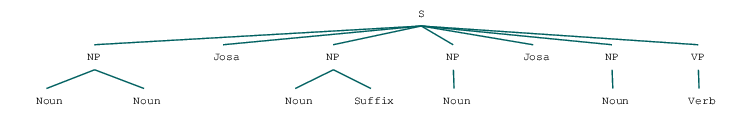

In [3]:
# 구문 파싱객체를 사용하여 Tree 구조를 시각화 하기
chunks = parser.parse(words)
chunks

In [4]:
# 생성한 Tree 구조를 List 객체로 묶어서 출력한다
text_tree = [list(txt)    for txt in chunks.subtrees()]
text_tree[1:]

[[('민병삼', 'Noun'), ('대령', 'Noun')],
 [('항', 'Noun'), ('명', 'Suffix')],
 [('행위', 'Noun')],
 [('초치', 'Noun')],
 [('하다', 'Verb')]]

<br>
### **자연어 구문 분석과정**
<br>
1. 우선 언어학을 근간으로 한다
1. <strike>말소리를 연구하는 **음운론(Phonology)** : 음성인식</strike>
1. <strike>단어와 형태소를 연구하는 **형태론(Morphology)** : 형태소 분석</strike>
1. 문법과 맥락/담화를 각각 논의하는 **통사론(syntax)** : 문법적 구조분석(Passing)
1. 단어간의 의미차이를 구분하는 **의미론(Senmantics)** : 뉘앙스, 톤, 말하고자 하는 의도(긍/부정)
1. 그리고 한글과 영어의 문화적 차이
<br>
<img src="http://i.imgur.com/1bhgstG.png" align="left" width="650"/>
<br>

In [5]:
# 활용방법
# 문장의 구조도를 추출 가능하다
# 1. 개별 단어의 Tag로 분석하기 어려운 구분을 분석한다
# 1. 문장의 Ton을 세부적 분석한다 
# 1. 긍/ 부정의 분석 등의 세부적인 내용을 분석한다

<br>
### 영어 같은 경우 (nltk) 문법 규칙들이 많이 성립되어 있어다
1. CFG (Context Free Grammer) : '노암촘스키'가 만든 문법기준
2. ATIS 문법 : 공항 안내시스템 개발용 문법규칙
3. CKY 차트 파싱 알고리즘 

<br>
### 한글의 경우
1. Konlp, Konlpy
1. 국립국어원 언어정보 나눔터
1. https://ithub.korean.go.kr/user/total/database/corpusManager.do
1. 영어 관련된 이론들을 정리해서 한글레 적용해 나간다

<br>
# **2 단어를 활용한 문장분석**
Word Token

<br>
<br>
## **1 단어의 출현 빈도를 활용**
word Token

### 텍스트에 지프의 법칙 적용

    지프의 법칙(Zipf's law)에 따르면 텍스트의 토큰중 가장 많이 나오는 토큰과 가장 적게 나오는 토큰은 정비례한다.

    지프의 법칙 : 어떠한 자연어 말뭉치 표현에 나타나는 단어들을 그 사용 빈도가 높은 순서대로 나열하였을 때, 모든 단어의 사용 빈도는 해당 단어의 순위에 반비례한다. 따라서 가장 사용 빈도가 높은 단어는 두 번째 단어보다 빈도가 약 두 배 높으며, 세 번째 단어보다는 빈도가 세 배 높다.


In [6]:
# 독일 퀘르버 재단 연설문 : 베를린 선언
# 문서 불러오기
f     = open('./data/베를린선언.txt', 'r')
texts_Berlin_raw = f.read()
f.close()
texts_Berlin_raw[:100]

'존경하는 독일 국민 여러분,\n\n고국에 계신 국민 여러분,\n\n하울젠 쾨르버재단 이사님과 모드로 전 동독 총리님을 비롯한 내외 귀빈 여러분,\n\n\n먼저, 냉전과 분단을 넘어 통일을 이루'

In [7]:
# Word Token 생성
from nltk import FreqDist, word_tokenize
texts = word_tokenize(texts_Berlin_raw)
texts[:10]

['존경하는', '독일', '국민', '여러분', ',', '고국에', '계신', '국민', '여러분', ',']

In [8]:
# Stop Word 전처리
import string
punct = string.punctuation
punct = [punct[i] for i in range(len(punct))]
punct = punct + ['\n', ')', '(']

# 불필요한 기호들을 제거한다
for dump in punct: 
    texts = [txt.replace(dump, '')    for txt in texts]
texts_Berlin = [txt    for txt in texts  if len(txt) > 2]
print(len(texts_Berlin))

1290


In [9]:
texts_token_dict = dict(FreqDist(texts_Berlin))

import pandas as pd
texts_token_series = pd.Series(texts_token_dict)
texts_token_series.sort_values(ascending=False)

것입니다      28
한반도       20
있습니다      16
합니다       16
북한의       12
한반도의      11
북한이       11
여러분       10
평화를       10
일입니다       6
세계의        6
남북이        6
평화와        6
국제사회의      6
나가겠습니다     5
군사적        5
통일을        5
새로운        5
없습니다       4
평화로운       4
정부의        4
평화의        4
협력을        4
이산가족       4
도발을        4
우리는        4
김대중        4
비핵화를       4
나가야        4
안전을        4
          ..
체결을        1
평화협정       1
부산과        1
출발한        1
화합을        1
열차가        1
치유하고       1
구성원의       1
일관성을       1
분리해        1
상황과        1
정치‧군사적     1
비정치적       1
다섯째        1
경제모델을      1
실천하기만      1
정상선언을      1
공동번영할      1
교량국가로      1
해양을        1
대륙과        1
추진될        1
협력사업들도     1
가스관        1
남·북·러      1
유럽으로       1
러시아와       1
북경으로       1
평양과        1
인위적인       1
Length: 923, dtype: int64

<br>
<br>
## **2 불용어 처리**
1. 직접적인 연관성이 낮은 단어들을 제외하고 분석을 한다
1. 문장이 짧고, 함축적일 수록 불용어를 제외하면 성능이 낮은 경우가 많아서 특정한 규칙이 정해져 있지는 않다

In [10]:
# 영어의 경우
# from nltk.corpus import stopwords
texts = 'I like such a Wonderful Snow Ice Cream'
texts = texts.lower()
texts

'i like such a wonderful snow ice cream'

In [11]:
from nltk import word_tokenize
tokens = word_tokenize(texts)
tokens

['i', 'like', 'such', 'a', 'wonderful', 'snow', 'ice', 'cream']

In [12]:
# 불용어 목록을 추출
from nltk.corpus import stopwords
stopwords.words('english')[::18]

['i', 'her', 'those', 'an', 'into', 'further', 'such', 'now', 'mightn']

In [13]:
tokens = [word   for word in tokens   
                 if word not in stopwords.words('english')]
print(tokens)

['like', 'wonderful', 'snow', 'ice', 'cream']


In [14]:
# 한글의 경우 별도로 패키지가 없다
# 같은 한글단어라도 품사에 따라 다르게 작용하므로 품사별 단어를 함께 정리
# 분석 대상 및 성격에 맞는 불용어 사전을 알맞게 조정해서 활용할 필요가 있다
# 쉽지 않아.. 쉽지 않아...
f = open('./data/한국어불용어100.txt', 'r')
s = f.read(); f.close()

stop_words = [ txt.split('\t')[:2]  for txt in s.split('\n') ]
stopword   = {}
for txt in stop_words:
    try:    stopword[txt[0]] = txt[1]
    except: pass
stopword

{'이': 'NP',
 '있': 'VA',
 '하': 'VV',
 '것': 'NNB',
 '들': 'VV',
 '그': 'MM',
 '되': 'VV',
 '수': 'NNB',
 '보': 'VX',
 '않': 'VX',
 '없': 'VA',
 '나': 'VX',
 '사람': 'NNG',
 '주': 'VV',
 '아니': 'VCN',
 '등': 'NNB',
 '같': 'VA',
 '우리': 'NP',
 '때': 'NNG',
 '년': 'NNB',
 '가': 'VV',
 '한': 'MM',
 '지': 'VX',
 '대하': 'VV',
 '오': 'VV',
 '말': 'VX',
 '일': 'NNB',
 '그렇': 'VA',
 '위하': 'VV',
 '때문': 'NNB',
 '그것': 'NP',
 '두': 'VV',
 '말하': 'VV',
 '알': 'VV',
 '그러나': 'MAJ',
 '받': 'VV',
 '못하': 'VX',
 '그런': 'MM',
 '또': 'MAG',
 '문제': 'NNG',
 '더': 'MAG',
 '사회': 'NNG',
 '많': 'VA',
 '그리고': 'MAJ',
 '좋': 'VA',
 '크': 'VA',
 '따르': 'VV',
 '중': 'NNB',
 '나오': 'VV',
 '가지': 'VV',
 '씨': 'NNB',
 '시키': 'XSV',
 '만들': 'VV',
 '지금': 'NNG',
 '생각하': 'VV',
 '그러': 'VV',
 '속': 'NNG',
 '하나': 'NR',
 '집': 'NNG',
 '살': 'VV',
 '모르': 'VV',
 '적': 'XSN',
 '월': 'NNB',
 '데': 'NNB',
 '자신': 'NNG',
 '안': 'MAG',
 '어떤': 'MM',
 '내': 'VV',
 '경우': 'NNG',
 '명': 'NNB',
 '생각': 'NNG',
 '시간': 'NNG',
 '그녀': 'NP',
 '다시': 'MAG',
 '이런': 'MM',
 '앞': 'NNG',
 '보이': 'VV',
 '번': '

<br>
## **3-1 통계적 이론의 활용**
문장의 Token을 [ list ] 객체를 활용한 분석

### **레벤슈타인 편집거리 는**  [참고슬라이드](https://www.slideshare.net/eungihong16/ss-56515076)
1. 철자의 오류수정, 비슷한 어구 검색 등으로 활용되고
1. 의학분야에서는 DNA 배열의 유사성을 판단하는 기준으로 사용한다
1. 1번 작업하는 위치는 중요하지 않지만 작업 순번에 따라 최소한의 작업내용을 요약 가능해야 한다

In [15]:
# 원본 Text
text1 = "자연 언어에 대한 연구는 오래전부터 이어져 오고 있음에도 2018년까지도 사람처럼 이해하지는 못한다.".split()
# 몇가지 단어를 바꾼다
text2 = "자연 언어에 대한 연구는 오래전부터 이어져 들어서도 아직 컴퓨터가 사람처럼 이해하지는 못한다.".split()
# text2 와 동일한 단어의 어순만 변경
text3 = "자연 아직 컴퓨터가 언어에 들어서도 못한다 이어져 사람처럼 이해하지는 대한 연구는 오래전부터.".split()
len(text1), len(text2), len(text3)

(12, 12, 12)

In [16]:
# 01 편집거리의 계산
# 두 단어/ 문장이 같은 내용이 되려면 몇번의 수정을 필요로 하는지 계산
from nltk.metrics import edit_distance
edit_distance('파이썬 알고리즘', '파파미 알탕')

5

In [17]:
print('생략된 단어가 다를 때 : {} \n어휘 순서를 바꿨을 때 : {}'.format(
    edit_distance(text1, text2), 
    edit_distance(text2, text3)))

생략된 단어가 다를 때 : 3 
어휘 순서를 바꿨을 때 : 10


In [18]:
# 02 accuracy 정확도 측정
from nltk.metrics import accuracy
accuracy('파이썬', '파이프')

0.6666666666666666

In [19]:
print('생략된 단어가 다를 때 {:.4} \n어휘 순서를 바꿨을 때 {:.4}'.format(
    accuracy(text1, text2), 
    accuracy(text2, text3)))

생략된 단어가 다를 때 0.75 
어휘 순서를 바꿨을 때 0.08333


<br>
<br>
## **3-2 통계적 이론의 활용**
문장의 Token을 { set } 객체를 활용한 분석
1. precision = Correct / (Correct + Incorrect + Missing)
1. recall = Correct / (Correct + Incorrect + Spurious<가짜>)
1. f_measure = (2 X Precision X Recall) / (Precision + Recall)

In [20]:
# 원본 Text
text1 = set(text1)
text2 = set(text2)
text3 = set(text3)
len(text1), len(text2), len(text3)

(12, 12, 12)

In [21]:
from nltk.metrics import precision
precision({'파이썬'}, {'파르썬'})

0.0

In [22]:
# precision 정확도 측정
# List 객체가 아닌 Set 객체를 활용하므로 어순을 무시한 유사도 측정을 한다

print('생략된 단어가 다를 때 {:.4} \n어휘 순서를 바꿨을 때 {:.4}'.format(
    precision(set(text1), set(text2)), 
    precision(set(text2), set(text3))))

생략된 단어가 다를 때 0.75 
어휘 순서를 바꿨을 때 0.8333


In [23]:
# recall 어휘의 재현율

from nltk.metrics import recall
print('생략된 단어가 다를 때 {:.4} \n어휘 순서를 바꿨을 때 {:.4}'.format(
    recall(text1, text2), 
    recall(text2, text3)))

생략된 단어가 다를 때 0.75 
어휘 순서를 바꿨을 때 0.8333


In [24]:
# f-measure 측정

from nltk.metrics import f_measure
print('생략된 단어가 다를 때 {:.4} \n어휘 순서를 바꿨을 때 {:.4}'.format(
    f_measure(text1, text2), 
    f_measure(text2, text3)))

생략된 단어가 다를 때 0.75 
어휘 순서를 바꿨을 때 0.8333


<br>
# **3 N-gram 의 활용**
1. **고전적인 통계적 이론** 및 , **MLP(Multi Line Perceptron) 알고리즘 분석**시 Token의 갯수가 일치해야 한다
1. 정해진 기준보다 갯수가 적으면 **Zero Padding**을 활용하여 전체 길이는 맞춘다
1. Text 분석량이 많아질수록 불필요한 저장공간과, 전체 Token을 별도의 차원으로 나눠야 하는 등의 효율성 문제가 발생 
1. 따라서 문장별 길이의 무관하게, **일정한 기준에 따른 단위별 묶음** 을 활용함으로써 다양한 추가적 분석기법을 활용 가능하다
1. 단점으로는 N-gram을 활용함에 따라 원본 데이터가 늘어난다

<img src="https://i.stack.imgur.com/8ARA1.png" align="left">

<br>
<br>
## **1 N-gram 생성하기**
Token 을 생성한 뒤, 갯수별로 Tuple을 묶는다

In [25]:
texts_sample = texts_Berlin[:20]
texts_sample

['존경하는',
 '여러분',
 '고국에',
 '여러분',
 '하울젠',
 '쾨르버재단',
 '이사님과',
 '모드로',
 '총리님을',
 '비롯한',
 '여러분',
 '냉전과',
 '분단을',
 '통일을',
 '이루고',
 '힘으로',
 '유럽통합과',
 '국제평화를',
 '선도하고',
 '독일과']

In [26]:
# 영문의 경우 띄어쓰기를 기준으로 Token을 생성한다
# 한글의 경우 같은 단어여도, 단어의 위치 조사와 결합여부에 따라 개별 단어 Token 간의 위상값이 달라진다
# 이번의 경우에는 Twitter 모듈을 활용하여 Tag를 정의한다
from nltk.util import ngrams

texts_sample = [txt for txt in ngrams(texts_sample, 3)]
texts_sample[:5]

[('존경하는', '여러분', '고국에'),
 ('여러분', '고국에', '여러분'),
 ('고국에', '여러분', '하울젠'),
 ('여러분', '하울젠', '쾨르버재단'),
 ('하울젠', '쾨르버재단', '이사님과')]

<br>
<br>
## **2 Point wise Mutual Information**
1. PMI : https://www.slideshare.net/RetrieverJo/pmi-twitter-57723391
1. 단어간의 거리를 비교측정하여 상관성을 분석한다
1. Bi-gram, Tri-gram을 기준을 두고서 문장을 분석한다
1. 연어 (근접어:collocation) 관계를 통해서 문장성분을 분석가능한 객체를 생성한다
1. PMI 는 단어간의 상관관계 확률론을 근거로, **단어간의 독립을 가정할 때 발생확률**과 **문서에서 측정된 동시발생확률**을 비교하여 상관성을 분석한다

In [27]:
# Text 내용 중 한글만 추출한다
from nltk.tokenize import RegexpTokenizer
re_capt = RegexpTokenizer('[가-힣]\w+')
raw_texts = re_capt.tokenize(texts_Berlin_raw)
raw_texts[:10]

['존경하는', '독일', '국민', '여러분', '고국에', '계신', '국민', '여러분', '하울젠', '쾨르버재단']

In [28]:
texts = ''
for txt in raw_texts:
    texts += txt + " "
texts[:200]

'존경하는 독일 국민 여러분 고국에 계신 국민 여러분 하울젠 쾨르버재단 이사님과 모드로 동독 총리님을 비롯한 내외 귀빈 여러분 먼저 냉전과 분단을 넘어 통일을 이루고 힘으로 유럽통합과 국제평화를 선도하고 있는 독일과 독일 국민에게 무한한 경의를 표합니다 오늘 자리를 마련해 주신 독일 정부와 쾨르버 재단에도 감사드립니다 아울러 얼마 별세하신 헬무트 총리의 가족'

In [29]:
%%time
# 베를린 선언문에 Tag 속성 추가하기
from konlpy.tag import Twitter
twitter = Twitter()
tagged_words = twitter.pos(texts)

CPU times: user 1.78 s, sys: 51.4 ms, total: 1.83 s
Wall time: 565 ms


<br>
### **01 Bi-Gram 을 대상**
어휘간 우도 추출
http://konlpy-ko.readthedocs.io/ko/v0.4.3/examples/collocations/

In [30]:
# Bi-gram 을 대상으로 단어간 최대우도를 갖는 관계 측정
from nltk import collocations

finder = collocations.BigramCollocationFinder.from_words(tagged_words)
finder

In [31]:
# top 10 n-grams with highest PMI
measures = collocations.BigramAssocMeasures()
finder.nbest(measures.pmi, 10)

[(('가능하며', 'Adjective'), ('불가', 'Noun')),
 (('가스', 'Noun'), ('관', 'Noun')),
 (('가운데', 'Noun'), ('현재', 'Noun')),
 (('감사', 'Noun'), ('드립니', 'Verb')),
 (('갖춰', 'Verb'), ('지', 'PreEomi')),
 (('같은', 'Adjective'), ('공감', 'Noun')),
 (('거나', 'Eomi'), ('깨져', 'Verb')),
 (('건너지', 'Verb'), ('않기', 'Verb')),
 (('걷어', 'Verb'), ('차는', 'Verb')),
 (('검증', 'Noun'), ('가능하며', 'Adjective'))]

<br>
### **02 Tri-Gram 을 대상**
어휘간 우도 추출

In [32]:
# Tri-gram 을 대상으로 단어간 최대우도를 갖는 관계 측정
finder = collocations.TrigramCollocationFinder.from_words(tagged_words)
finder

In [33]:
# top 10 n-grams with highest PMI
measures = collocations.TrigramAssocMeasures()
finder.nbest(measures.pmi, 10)

[(('가능하며', 'Adjective'), ('불가', 'Noun'), ('역적', 'Noun')),
 (('가스', 'Noun'), ('관', 'Noun'), ('연결', 'Noun')),
 (('가운데', 'Noun'), ('현재', 'Noun'), ('생존', 'Noun')),
 (('같은', 'Adjective'), ('공감', 'Noun'), ('대', 'Suffix')),
 (('거나', 'Eomi'), ('깨져', 'Verb'), ('서도', 'Noun')),
 (('검증', 'Noun'), ('가능하며', 'Adjective'), ('불가', 'Noun')),
 (('견', 'Noun'), ('지하', 'Noun'), ('면서', 'Noun')),
 (('과도', 'Josa'), ('같은', 'Adjective'), ('공감', 'Noun')),
 (('들어서는', 'Verb'), ('대전', 'Noun'), ('환', 'Noun')),
 (('록', 'Eomi'), ('앞장서서', 'Verb'), ('돕겠', 'Verb'))]

<br>
## **3 은닉 마르코프 모델 추정**
http://untitledtblog.tistory.com/31 (알고리즘해설)
Hidden Markov Model estimation

1. $x_0, x_1..$ : 은닉상태 , $y_0, y_1 ..$ : 관찰 가능한 상태
1. 명확한 확률분포와 관련된 상태의 유한집합으로 구성된 분석방법이다
1. 단점으로는 많은 훈련을 필요로 하고, 큰 의존성을 사용될 수 없다

<p><img src="http://iacs-courses.seas.harvard.edu/courses/am207/blog/hmm.png" align='left' width='600'>

<br>
### **01 Hidden Markov Model estimation**
HMM추정을 사용해 테스트를 수행

In [34]:
texts = texts_Berlin_raw.split('\n\n')
texts[:10]

['존경하는 독일 국민 여러분,',
 '고국에 계신 국민 여러분,',
 '하울젠 쾨르버재단 이사님과 모드로 전 동독 총리님을 비롯한 내외 귀빈 여러분,',
 '\n먼저, 냉전과 분단을 넘어 통일을 이루고,',
 '그 힘으로 유럽통합과 국제평화를 선도하고 있는',
 '독일과 독일 국민에게 무한한 경의를 표합니다.',
 '\n오늘 이 자리를 마련해 주신',
 '독일 정부와 쾨르버 재단에도 감사드립니다.',
 '\n아울러, 얼마 전 별세하신 故 헬무트 콜 총리의 가족과 ',
 '독일 국민들에게 깊 은 애도와 위로의 마음을 전합니다.']

In [35]:
texts = [text.replace('\n', '')  for text in texts]
texts = [text.replace(',', '')  for text in texts]
texts = [text.replace('.', '')  for text in texts]
texts[:10]

['존경하는 독일 국민 여러분',
 '고국에 계신 국민 여러분',
 '하울젠 쾨르버재단 이사님과 모드로 전 동독 총리님을 비롯한 내외 귀빈 여러분',
 '먼저 냉전과 분단을 넘어 통일을 이루고',
 '그 힘으로 유럽통합과 국제평화를 선도하고 있는',
 '독일과 독일 국민에게 무한한 경의를 표합니다',
 '오늘 이 자리를 마련해 주신',
 '독일 정부와 쾨르버 재단에도 감사드립니다',
 '아울러 얼마 전 별세하신 故 헬무트 콜 총리의 가족과 ',
 '독일 국민들에게 깊 은 애도와 위로의 마음을 전합니다']

In [36]:
# 문장별 List로 구분하여 tag 목록을 생성하기
tagged_words = [twitter.pos(text)  for text in texts]
tagged_words[:2]

[[('존경하는', 'Verb'), ('독일', 'Noun'), ('국민', 'Noun'), ('여러분', 'Noun')],
 [('고국', 'Noun'),
  ('에', 'Josa'),
  ('계신', 'Verb'),
  ('국민', 'Noun'),
  ('여러분', 'Noun')]]

In [37]:
# 문장 분석에서 사용된 Tag 를 추출
from nltk.util import unique_list

tag_set = unique_list( tag     for sent        in  tagged_words     
                               for (word, tag) in  sent )
print(len(tag_set))
tag_set

16


['Verb',
 'Noun',
 'Josa',
 'Suffix',
 'Adjective',
 'Eomi',
 'Exclamation',
 'Foreign',
 'Determiner',
 'Number',
 'Punctuation',
 'Alpha',
 'PreEomi',
 'Adverb',
 'Conjunction',
 'VerbPrefix']

In [38]:
# sentence 에 사용된 고유 단어들을 추출
symbols = unique_list( word     for sent        in  tagged_words    
                                for (word, tag) in  sent )
print(len(symbols))
symbols[:10]

987


['존경하는', '독일', '국민', '여러분', '고국', '에', '계신', '하울', '젠', '쾨르버']

In [39]:
# 히든 마르코프 훈련모듈 활성화 (92개 tag,  1464개 문장) 
def train_and_test(tagged_words, est):

    from nltk.util import unique_list
    # 문장에 사용된 중복된 tag 를 요약
    tag_set = unique_list( tag   for sent        in  tagged_words     
                                 for (word, tag) in  sent )
    # 문장에 사용된 중복된 단어를 요약
    symbols = unique_list( word  for sent        in  tagged_words    
                                 for (word, tag) in  sent )
    import nltk
    trainer = nltk.tag.HiddenMarkovModelTrainer(tag_set, symbols)
    train_corpus, test_corpus = [], []  
    for i in range(len(tagged_words)) :
        # train 90% , test 10% 데이터 생성
        if i % 10 :  
            train_corpus += [tagged_words[i]]
        else :       
            test_corpus += [tagged_words[i]]
    hmm = trainer.train_supervised(train_corpus, estimator = est)
    print('%.2f%%' % (100 * hmm.evaluate(test_corpus)))

train_and_test(tagged_words, None)

44.69%


In [40]:
# 음성분석의 경우 Text로 변경시 HMM을 활용 가능하고, 성능또한 우수하다
# https://github.com/jihyun300/Speech-Recognizer
# Tensorflow, Pytorch 등의 머신러닝 모듈을 사용할 때 보다 가볍고, 설정의 변경이 용이하다
# 실제로 맞춤범 검사의 경우, 머신러닝/ 딥러닝 보다 "퍼지이론"을 활용한 전문적인 모듈이 우수한 성능을 나타낸다
# Text 분석의 경우 

In [41]:
# 영문의 경우 Brown 어휘목록을 활용한 HMM추정
def HMM_english():
    import nltk
    cor = nltk.corpus.brown.tagged_sents(categories='adventure')[:500]

    from nltk.util import unique_list
    tag_set = unique_list( tag  for sent        in  cor     
                                for (word, tag) in  sent )
    symbols = unique_list( word  for sent        in  cor    
                                 for (word, tag) in  sent )
    print("tag set  : {} \nWord set : {}".format(len(tag_set), len(symbols)))

    train_corpus, test_corpus = [], []  
    trainer = nltk.tag.HiddenMarkovModelTrainer(tag_set, symbols)
    for i in range(len(cor)) :
        if i % 10 :  train_corpus += [cor[i]]   # train 90% , test 10% 데이터 생성
        else :       test_corpus += [cor[i]]
    hmm = trainer.train_supervised(train_corpus, estimator=None)  # .train_supervised()
    print('%.2f%%' % (100 * hmm.evaluate(test_corpus)))

In [42]:
# 히든 마르코프 훈련모듈 활성화 (92개 tag,  1464개 문장) 
HMM_english()

tag set  : 92 
Word set : 1464
22.75%


<br>
## **4 TF-IDF**
Term Frequency-Inverse Document Frequency
1. 문서의 내용을 쉽게 벡터로 표현하는 고전적인 방식
1. Term Frequency (용어의 빈도) : 특정 용어의 발생빈도를 연산 (문서에서 Token의 출현빈도)/(문서의 전체 Token의 갯수)
1. Inverse Document Frequency (문서 빈도의 역) : 해당 문서를 이해하는데 단어의 중요도 (일반 문서에서의 출현빈도 대비 해당 문서에서의 출현빈도)
1. **TF**는 해당 문서가 있으면 바로 연산이 가능하지만
1. 하지만 **IDF**는 모집단의 Corpus 별로 **일반적인 문서에서 개별 Token의 출현빈도**를 계산한 결과값을 기본으로 제공해야만 연산이 가능하다
1. 한글의 경우 **Konlpy** 에서 제공하는 **Komoran** 을 활용하면 **IDF**를 연산 가능하다

### Source  Code : https://stackoverflow.com/questions/45232671/obtain-tf-idf-weights-of-words-with-sklearn

### Image : https://blog.exploratory.io/quantifying-documents-by-calculating-tf-idf-in-r-94a4ccea2b38

<img src="https://cdn-images-1.medium.com/max/1400/1*fooU_APWpC5HypRHYxeJGQ.png" align="left" width='500'><br>
<img src="https://cdn-images-1.medium.com/max/1600/1*hno6Kll3MSBdp7udl3E1tw.png" align="left" width='500'><br>

In [43]:
# 연설문 파일 불러오기
f = open('./data/trump.txt', 'r')
texts_org = f.read()
f.close()

# Word Token으로 변환
from nltk import word_tokenize
texts = word_tokenize(texts_org)
texts[:5]

['Chief', 'Justice', 'Roberts', ',', 'President']

In [44]:
# Punctuation 문장기호 와 Stopword 목록 추출
from nltk.corpus import stopwords
stopword_eng = stopwords.words('english')

import string
punct = string.punctuation
punct = [punct[i] for i in range(len(punct))]
punct = punct + stopword_eng + ['\n'] 
len(punct)

186

In [45]:
# Token 중에 punct 에 포함되지 않은 단어들로만 추출하여 목록을 새로 만들고
# 새로 만든 token을 사용하여 Text 새롭게 재구성하기
texts = [txt.lower()    for txt in texts   if txt.lower() not in punct]
document = ''
for txt in texts:
    document += txt + ' '

In [46]:
# Scikit-Learn 을 사용하여 Tf-idf 연산
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec   = TfidfVectorizer()
transformed = tfidf_vec.fit_transform(raw_documents = [document])
index_value = {i[1]:i[0] for i in tfidf_vec.vocabulary_.items()}

# tfidf 학습결과를 저장한 객체로 바로 내용을 알 수 없다
transformed 

<1x456 sparse matrix of type '<class 'numpy.float64'>'
	with 456 stored elements in Compressed Sparse Row format>

In [47]:
# tf-idf 연산결과를 담을 객체
fully_indexed = []

import numpy as np
transformed = np.array(transformed.todense())

for row in transformed:
    fully_indexed.append({index_value[column]:value for (column,value) in enumerate(row)})

In [48]:
import pandas as pd
tfidf = pd.Series(fully_indexed[0]).sort_values(ascending=False)
tfidf[:15]

america     0.423619
american    0.232990
people      0.211809
country     0.190628
nation      0.190628
one         0.169447
every       0.148266
never       0.127086
world       0.127086
back        0.127086
new         0.127086
great       0.127086
make        0.105905
god         0.105905
today       0.105905
dtype: float64

In [49]:
tfidf['great']

0.12708556268223822